# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [11]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [12]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

610

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [13]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key
url_list = []

# Create lists for appending API call data
city = []
city_ids = []
cities_list = []


#Set Counter & Start Log
counter = 0

print("Beginning Data Retrieval")
print("-----------------------------------")

#Begin conditional loop of urls & cities and append responses
#in list for logging city id records
for city in cities: 
    counter += 1
    print(f'This is record {counter} in the set: {city}')
    response = requests.get(f"{url}&q={city}").json()
    cityrecord = response.get("id")
    if response.get("id"):
        print(f'RecordID = {cityrecord}')
        url_list.append(response)
        cities_list.append(city)
        city_ids.append(cityrecord)
    else:
        print(f'{city} not found. Next record.')
  
print("-----------------------------------")  
print(" End of Data Retrival")

Beginning Data Retrieval
-----------------------------------
This is record 1 in the set: rikitea
RecordID = 4030556
This is record 2 in the set: qaanaaq
RecordID = 3831208
This is record 3 in the set: khatanga
RecordID = 2022572
This is record 4 in the set: busselton
RecordID = 2075265
This is record 5 in the set: te anau
RecordID = 2181625
This is record 6 in the set: carnarvon
RecordID = 1014034
This is record 7 in the set: wajima
RecordID = 1848976
This is record 8 in the set: barrow
RecordID = 3833859
This is record 9 in the set: husavik
RecordID = 5961417
This is record 10 in the set: jamestown
RecordID = 2069194
This is record 11 in the set: ushuaia
RecordID = 3833367
This is record 12 in the set: ribeira grande
RecordID = 3372707
This is record 13 in the set: geraldton
RecordID = 5960603
This is record 14 in the set: maumere
RecordID = 1635815
This is record 15 in the set: kaeo
RecordID = 2189343
This is record 16 in the set: bengkulu
bengkulu not found. Next record.
This is re

RecordID = 1733782
This is record 137 in the set: smithers
RecordID = 6149996
This is record 138 in the set: pokhara
RecordID = 1282898
This is record 139 in the set: khonuu
khonuu not found. Next record.
This is record 140 in the set: san quintin
RecordID = 1688687
This is record 141 in the set: vila franca do campo
RecordID = 3372472
This is record 142 in the set: omboue
RecordID = 2396853
This is record 143 in the set: chifeng
RecordID = 2038067
This is record 144 in the set: marseille
RecordID = 2995469
This is record 145 in the set: hoa binh
RecordID = 1580830
This is record 146 in the set: kichera
RecordID = 2022129
This is record 147 in the set: palabuhanratu
palabuhanratu not found. Next record.
This is record 148 in the set: saint-philippe
RecordID = 6138908
This is record 149 in the set: guerrero negro
RecordID = 4021858
This is record 150 in the set: manado
RecordID = 1636544
This is record 151 in the set: attawapiskat
attawapiskat not found. Next record.
This is record 152 

RecordID = 1808392
This is record 271 in the set: dabakala
RecordID = 2290609
This is record 272 in the set: bellefontaine
RecordID = 5146965
This is record 273 in the set: tateyama
RecordID = 1849876
This is record 274 in the set: tabiauea
tabiauea not found. Next record.
This is record 275 in the set: charters towers
RecordID = 2171722
This is record 276 in the set: sidi qasim
sidi qasim not found. Next record.
This is record 277 in the set: moose factory
RecordID = 6078372
This is record 278 in the set: port keats
RecordID = 2063039
This is record 279 in the set: sabana grande de boya
RecordID = 3493482
This is record 280 in the set: snezhnogorsk
RecordID = 795243
This is record 281 in the set: sandpoint
RecordID = 5606401
This is record 282 in the set: kingman
RecordID = 5301067
This is record 283 in the set: bredy
RecordID = 1508811
This is record 284 in the set: soe
RecordID = 587876
This is record 285 in the set: khasan
RecordID = 2039557
This is record 286 in the set: ankang
Re

RecordID = 2514651
This is record 408 in the set: lieksa
RecordID = 648090
This is record 409 in the set: alasehir
RecordID = 324172
This is record 410 in the set: manta
RecordID = 685981
This is record 411 in the set: ballina
RecordID = 2966778
This is record 412 in the set: verkh-usugli
RecordID = 2013459
This is record 413 in the set: nyurba
RecordID = 2018735
This is record 414 in the set: cam ranh
RecordID = 1586350
This is record 415 in the set: les cayes
RecordID = 3728097
This is record 416 in the set: lata
RecordID = 1253628
This is record 417 in the set: taoudenni
RecordID = 2450173
This is record 418 in the set: sao joao da barra
RecordID = 3448903
This is record 419 in the set: port-gentil
RecordID = 2396518
This is record 420 in the set: riyadh
RecordID = 108410
This is record 421 in the set: axim
RecordID = 2303611
This is record 422 in the set: pozo colorado
RecordID = 3437443
This is record 423 in the set: saquarema
RecordID = 3448011
This is record 424 in the set: arra

RecordID = 5053853
This is record 545 in the set: valverde del camino
RecordID = 2509835
This is record 546 in the set: kysyl-syr
RecordID = 2021017
This is record 547 in the set: halalo
halalo not found. Next record.
This is record 548 in the set: kazalinsk
kazalinsk not found. Next record.
This is record 549 in the set: chaguanas
RecordID = 3574810
This is record 550 in the set: juegang
RecordID = 1804979
This is record 551 in the set: zhezkazgan
RecordID = 1516589
This is record 552 in the set: tongren
RecordID = 1792592
This is record 553 in the set: milingimbi
milingimbi not found. Next record.
This is record 554 in the set: neuquen
RecordID = 3843123
This is record 555 in the set: arua
RecordID = 235039
This is record 556 in the set: bealanana
RecordID = 1068670
This is record 557 in the set: niigata
RecordID = 1855431
This is record 558 in the set: semey
RecordID = 1519422
This is record 559 in the set: mayor pablo lagerenza
RecordID = 3867427
This is record 560 in the set: kuda

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [22]:
#Get JSON dictionary information for independent lists
#using url & city lists defined in previous conditional

country = [url.get("sys").get("country") for url in url_list]
lat = [url.get("coord").get("lat") for url in url_list]
lng = [url.get("coord").get("lon") for url in url_list]
temp = [url.get("main").get("temp") for url in url_list]
hum = [url.get("main").get("humidity") for url in url_list]
cloudy = [url.get("clouds").get("all") for url in url_list]
winSpd = [url.get("wind").get("speed") for url in url_list]

#Append lists to a pandas dataframe
wDF = pd.DataFrame({
    "City": cities_list ,
    "Country": country  ,
    "Lat": lat ,
    "Lng": lng ,
    "Temp": temp,
    "Humidity": hum,
    "Cloudiness": cloudy,
    "WindSpeed": winSpd })

wDF.head()
    

,City,Country,Lat,Lng,Temp,Humidity,Cloudiness,WindSpeed
0,rikitea,PF,-23.12,-134.97,79.94,100,64,10.67
1,qaanaaq,GL,77.48,-69.36,-25.91,100,0,10.45
2,khatanga,RU,71.98,102.47,-9.71,68,64,10.11
3,busselton,AU,-33.64,115.35,74.94,82,0,6.20
4,te anau,NZ,-45.41,167.72,52.71,81,80,16.49


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

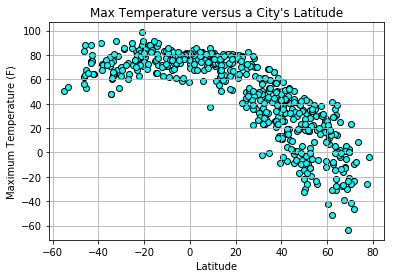

In [30]:
plt.scatter(wDF['Lat'], wDF['Temp'], marker = 'o', color = 'cyan', edgecolors= 'black')

plt.xlabel('Latitude')
plt.ylabel('Maximum Temperature (F)')
plt.title("Max Temperature versus a City's Latitude" )
plt.grid()
plt.savefig("LatTemp.png")

#### Latitude vs. Humidity Plot

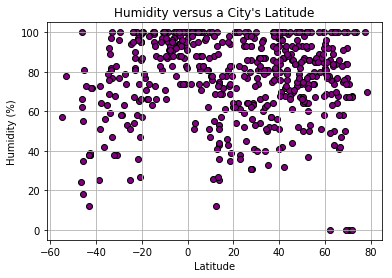

In [38]:
plt.scatter(wDF['Lat'], wDF['Humidity'], marker='o', color = 'purple', edgecolors='black')

plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title("Humidity versus a City's Latitude")
plt.grid()
plt.savefig('Humidit.png')

#### Latitude vs. Cloudiness Plot

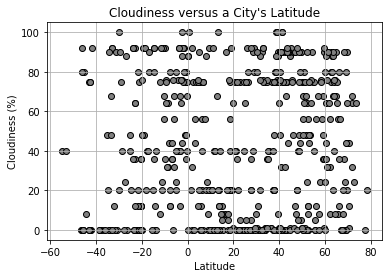

In [41]:
plt.scatter(wDF['Lat'],wDF['Cloudiness'], marker='o', color ='gray', edgecolors='black')

plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title("Cloudiness versus a City's Latitude")
plt.grid()
plt.savefig('Cloud.png')

#### Latitude vs. Wind Speed Plot

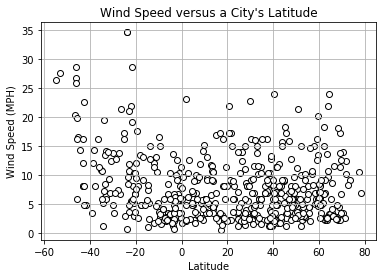

In [44]:
plt.scatter(wDF['Lat'], wDF['WindSpeed'], marker = 'o', color = 'white', edgecolors='black')

plt.xlabel('Latitude')
plt.ylabel('Wind Speed (MPH)')
plt.title("Wind Speed versus a City's Latitude")
plt.grid()
plt.savefig("Wind.png")